# Inferential statistics

## Z-Scores
calculate the convidence interval:
> Best Estimate +_ Margin of error

> Margin of error = z * Estimated SE

SE : Standard Error

Berikut adalag z-scores untuk beberapa convidence levels yang umum digunakan:
      
      * Convidence %     z
      
      * 75%              1.15
      * 90%              1.64
      * 95%              1.96
      * 97%              2.17
      * 99%              2.57
      * 99.90%           3.29

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import Math, Latex
from IPython.core.display import Image

import seaborn as sns
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(5,5)})

from scipy.stats import uniform
from scipy.stats import norm
from scipy.stats import gamma
from scipy.stats import expon
from scipy.stats import poisson
from scipy.stats import binom
from scipy.stats import bernoulli
import pandas as pd
import numpy as np

import statsmodels.api as sm
import scipy.stats.distributions as dist
from scipy.stats import shapiro


### Uniform Distribution

In [4]:
# Random numbers from uniform distribution
n = 10000
start = 10
width = 20
data_uniform = uniform.rvs(size=n, loc=start, scale=width)

In [5]:
data_uniform

array([28.88818332, 13.21999499, 26.37570022, ..., 29.62001491,
       28.06976953, 14.68234025])

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Uniform Distribution'), Text(0, 0.5, 'Frequency')]

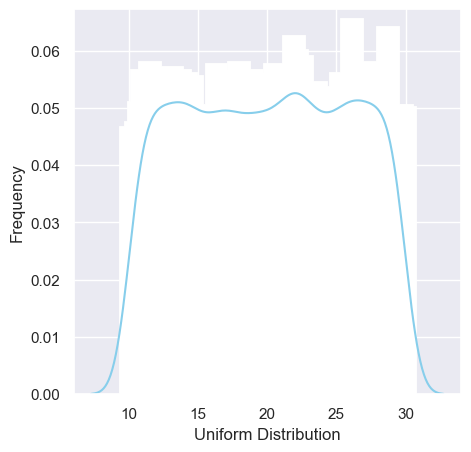

In [7]:
# Plot histogram distribusi
ax = sns.distplot(data_uniform,
                bins=100,
                kde=True,
                color='skyblue',
                hist_kws={"linewidth": 15, 'alpha':1})
ax.set(xlabel='Uniform Distribution', ylabel='Frequency')

### Normal Distribution

Kurva kepadatan simetris, berpusat di sekitar meannya, dengan penyebarannya ditentukan oleh deviasi standarnya yang menunjukkan bahwa data di dekat mean lebih sering terjadi daripada data yang jauh dari mean.

In [9]:
data_normal = norm.rvs(size=10000, loc=0, scale=1)

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Normal Distribution'), Text(0, 0.5, 'Frequency')]

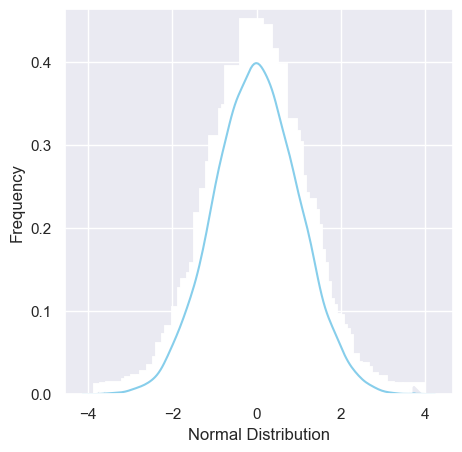

In [11]:
ax = sns.distplot(data_normal, 
                bins=100,
                kde=True,
                color='skyblue',
                hist_kws={"linewidth": 15, 'alpha':1})
ax.set(xlabel='Normal Distribution', ylabel='Frequency')

### Gamma Distribution

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Gamma Distribution'), Text(0, 0.5, 'Frequency')]

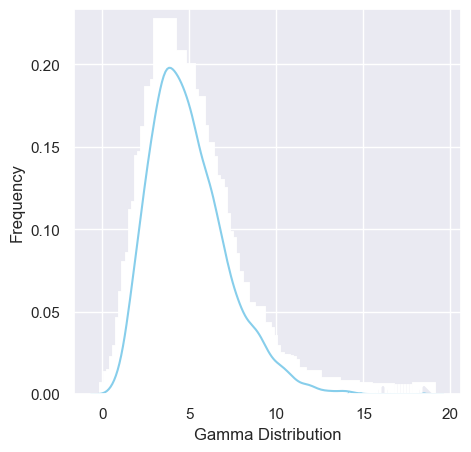

In [17]:
data_gamma = gamma.rvs(a=5, size=10000)

ax = sns.distplot(data_gamma,
                 kde=True,
                 bins=100,
                 color='skyblue',
                 hist_kws={"linewidth": 15, 'alpha':1})
ax.set(xlabel='Gamma Distribution', ylabel='Frequency')

### Exponential Distribution

In [19]:
data_expon = expon.rvs(scale=1, loc=0, size=1000)

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Exponential Distribution'), Text(0, 0.5, 'Frequency')]

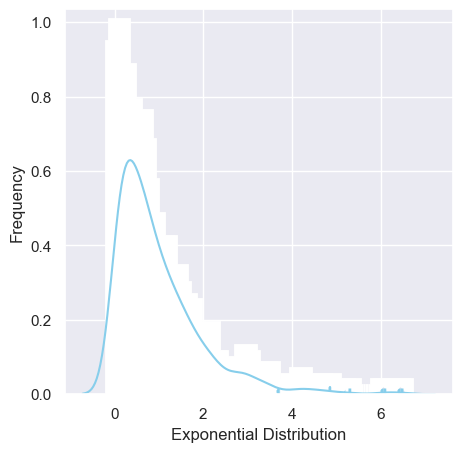

In [20]:
ax = sns.distplot(data_expon,
                 kde=True,
                 bins=100,
                 color='skyblue',
                 hist_kws={"linewidth": 15, 'alpha':1})
ax.set(xlabel='Exponential Distribution', ylabel='Frequency')

### Poison Distribution
biasanya digunakan untuk memodelkan berapa kali suatu peristiwa terjadi dalam interval waktu.

In [22]:
data_poisson = poisson.rvs(mu=3, size=10000)

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Poisson Distribution'), Text(0, 0.5, 'Frequency')]

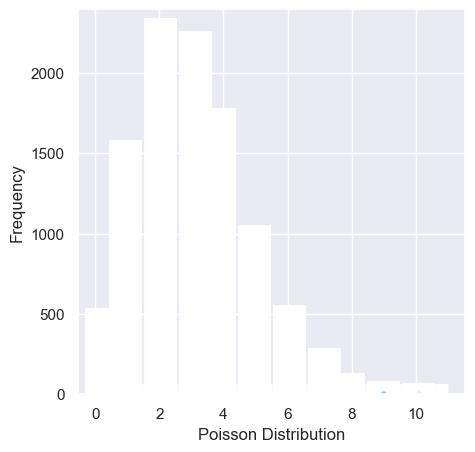

In [23]:
ax = sns.distplot(data_poisson,
                 bins=30,
                 kde=False,
                 color='skyblue',
                 hist_kws={"linewidth":15, 'alpha':1})
ax.set(xlabel='Poisson Distribution', ylabel='Frequency')

### Binomial Distribution

In [25]:
data_binom = binom.rvs(n=10, p=0.8, size=10000)

[Text(0.5, 0, 'Binomial Distribution'), Text(0, 0.5, 'Frequency')]

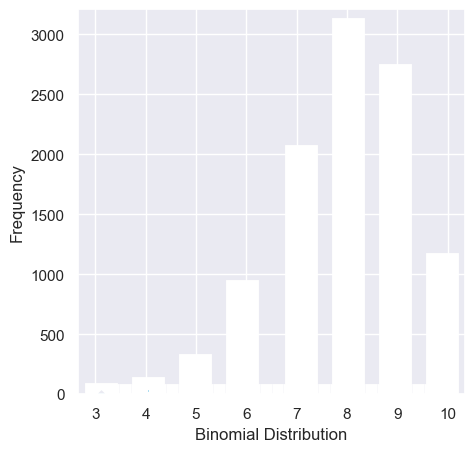

In [28]:
ax = sns.distplot(data_binom,
                 bins=30,
                 kde=False,
                 color='skyblue',
                 hist_kws={"linewidth":15, 'alpha':1})
ax.set(xlabel='Binomial Distribution', ylabel='Frequency')

### Bernoulli Distribution
Memiliki dua kemungkinan hasil, yaitu berhasik atau gagal, dan dalam satu kali percobaan. Misalnya oelemparan koin.

[Text(0.5, 0, 'Bernoulli Distribution'), Text(0, 0.5, 'Frequency')]

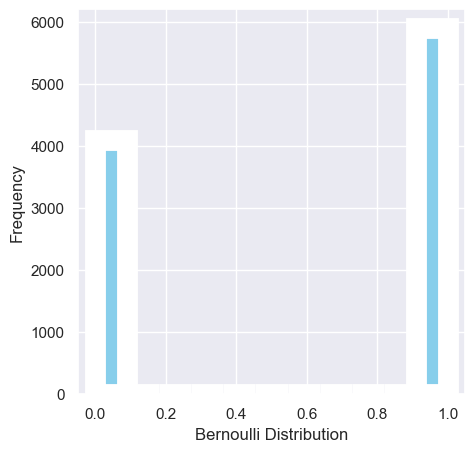

In [35]:
data_bernoulli = bernoulli.rvs(p=0.6, size=10000)

ax = sns.distplot(data_bernoulli,
                 kde=False,
                 color='skyblue',
                 hist_kws={"linewidth":15, 'alpha':1})
ax.set(xlabel='Bernoulli Distribution', ylabel='Frequency')

# Confidence Intervals
Confidence interval (CI) mengukur seberapa akuran mean sebuah sample mewakili (mencakup nilai mean populasi sesungguhnya. Atau merupakan rentang diantara dua nilai dimana suatu sample mean tepat berada di tengah-tengahnya.

In [26]:
df = pd.read_csv('../data/Heart.csv')

In [37]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [38]:
df['Sex1'] = df.sex.replace({1: "Male", 0:"Female"})

In [39]:
dx = df[["target", "Sex1"]].dropna()

In [40]:
pd.crosstab(dx.target, dx.Sex1)

Sex1,Female,Male
target,,
0,86,413
1,226,300


In [41]:
# Hitung populasi wanita
p_fm = 226/(86+226)
p_fm

0.7243589743589743

In [42]:
n = 84+226
n

310

In [43]:
# Hitung standar error
se_female = np.sqrt(p_fm * (1 - p_fm) / n)
se_female

0.025378620073863614

In [44]:
z_score = 1.96
lcb = p_fm - z_score* se_female 
ucb = p_fm + z_score* se_female 
lcb, ucb

(0.6746168790142016, 0.774101069703747)

In [45]:
import statsmodels.api as sm
sm.stats.proportion_confint(n * p_fm, n)

(0.6746177930368764, 0.7741001556810723)

## Calculation of CI of mean

In [46]:
df.groupby("Sex1").agg({"chol": [np.mean, np.std, np.size]})

chol                
              mean        std size
Sex1                              
Female  261.455128  64.466781  312
Male    239.237027  43.155535  713

In [10]:
mean_fe = 261.45 # mean cholesterol of female
sd = 64.4 # standard deviation for female
n = 312 # total number pf female
z = 1.96 # z-score from the z table mentioned before

In [11]:
se = sd/np.sqrt(n)

In [13]:
# Construc thr CI
lcb = mean_fe - z* se # Lower limit of the CI
ucb = mean_fe + z* se # upper limit of the CI
lcb, ucb

(254.3039731821066, 268.59602681789335)

Thats mean the true cholesterol of the female population will fall between that value

## Other Example

In [5]:
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import numpy as np
import random
import warnings
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
sns.set(rc={'figure.figsize': (13, 7.5)})
sns.set_context('talk')

## Generate Data of People's Mass in Pounds

In [8]:
np.random.seed(42)
dist_male = np.random.normal(loc=181, scale=24, size=6000)
dist_female = np.random.normal(loc=132, scale=22, size=6500)

dist_all = np.concatenate((dist_male, dist_female), axis=0)

df_ppl = pd.DataFrame(data={'dist_all' : dist_all})

In [9]:
df_ppl.head()

,dist_all
0,192.921140
1,177.681657
2,196.544525
3,217.552717
4,175.380319


Text(0.5, 1.015, 'Distribution of Mass of People in U.S.')

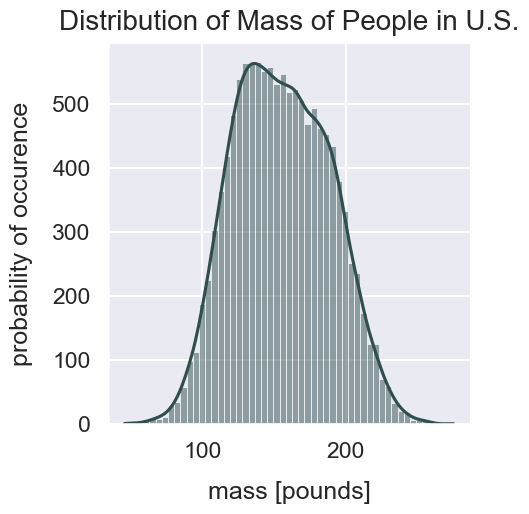

In [22]:
sns.displot(df_ppl['dist_all'], color="darkslategrey", kde=True)
plt.xlabel("mass [pounds]", labelpad=14)
plt.ylabel("probability of occurence", labelpad=14)
plt.title("Distribution of Mass of People in U.S.", y=1.015, fontsize=20)

In [10]:
# Calculation Population Mean
population = df_ppl['dist_all'].mean()
population

155.4232805942338

In [11]:
population = df_ppl['dist_all'].std()
population

33.585190883958624

In [12]:
sample_means = []
n = 25
for sample in range(0, 100):
    sample_values = np.random.choice(a=df_ppl['dist_all'], size=n)
    sample_mean = np.mean(sample_values)
    sample_means.append(sample_mean)

Text(27.819444444444443, 0.5, 'Frequency')

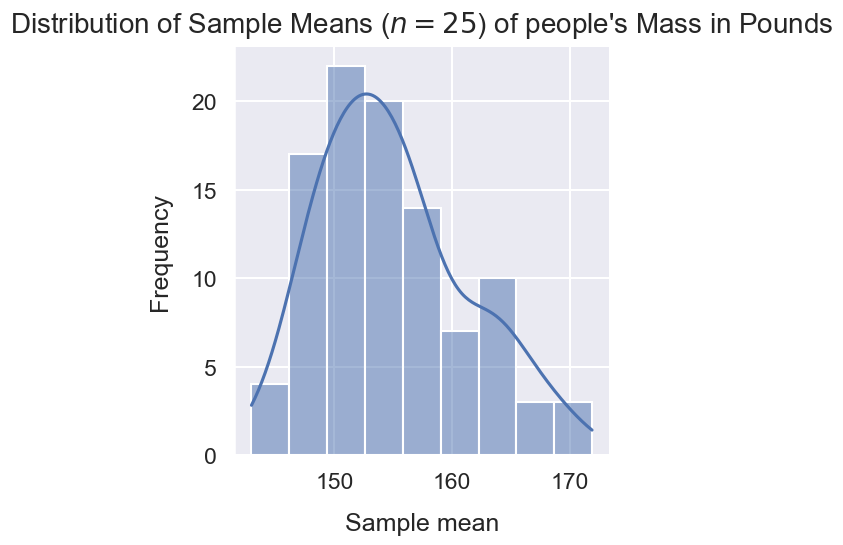

In [13]:
sns.displot(sample_means, kde=True)
plt.title("Distribution of Sample Means ($n=25$) of people's Mass in Pounds", y=1.015, fontsize=20)
plt.xlabel("Sample mean", labelpad=14)
plt.ylabel("Frequency", labelpad=14)

In [15]:
sample_means = []
n = 30
for sample in range (20, 400):
#     Random sampling
    sample_values = np.random.choice(a=df_ppl['dist_all'], size=n)
    sample_mean = np.mean(sample_values)
    sample_means.append(sample_mean)

Text(27.819444444444443, 0.5, 'freq')

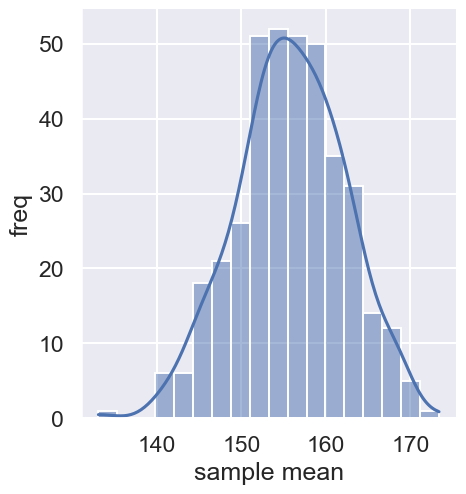

In [17]:
sns.displot(sample_means, kde=True)
plt.xlabel('sample mean')
plt.ylabel('freq')

Text(15.069444444444445, 0.5, 'freq')

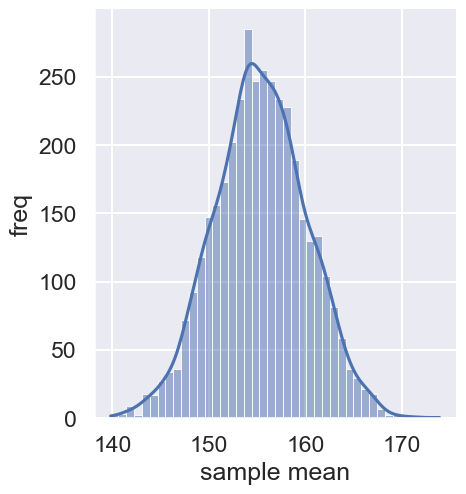

In [18]:
sample_means = []
n = 50
for sample in range (200, 4000):
#     Random sampling
    sample_values = np.random.choice(a=df_ppl['dist_all'], size=n)
    sample_mean = np.mean(sample_values)
    sample_means.append(sample_mean)
    
sns.displot(sample_means, kde=True)
plt.xlabel('sample mean')
plt.ylabel('freq')

In [19]:
np.median(sample_means)

155.33750164804

In [20]:
np.mean(sample_means)

155.37407965643607

In [29]:
np.mean(df_ppl)

dist_all    155.423281
dtype: float64

nilai mean dari sample kita ini mendekati dengan nilai mean dari population. Berdasarkan central limit theorem, hal ini akan selalu terjadi.

In [27]:
np.corrcoef(sample_means)

1.0

#### Equation for std sampling

In [31]:
standard_error = population/np.sqrt(n)
standard_error

4.749663244298352

In [32]:
np.sqrt(n)

7.0710678118654755

#### Critical Z-Scores

In [34]:
# Menggunakan z score untuk menghitung ekor 0.025
tail = 1-stats.norm.cdf(1.96)
tail

0.024997895148220484

# 

In [36]:
# The area under the curve between the z-critical scores is approx 0.95
1-(tail*2)

0.950004209703559

In [47]:
# area dimana 95 % sample berada dari mean populasi
lower_95 = np.mean(sample_means) - 1.96*standard_error
lower_95

146.0647396976113

In [46]:
# area dimana 95 % sample berada dari mean populasi
upper_95 = np.mean(sample_means) + 1.96*standard_error
upper_95

164.68341961526085

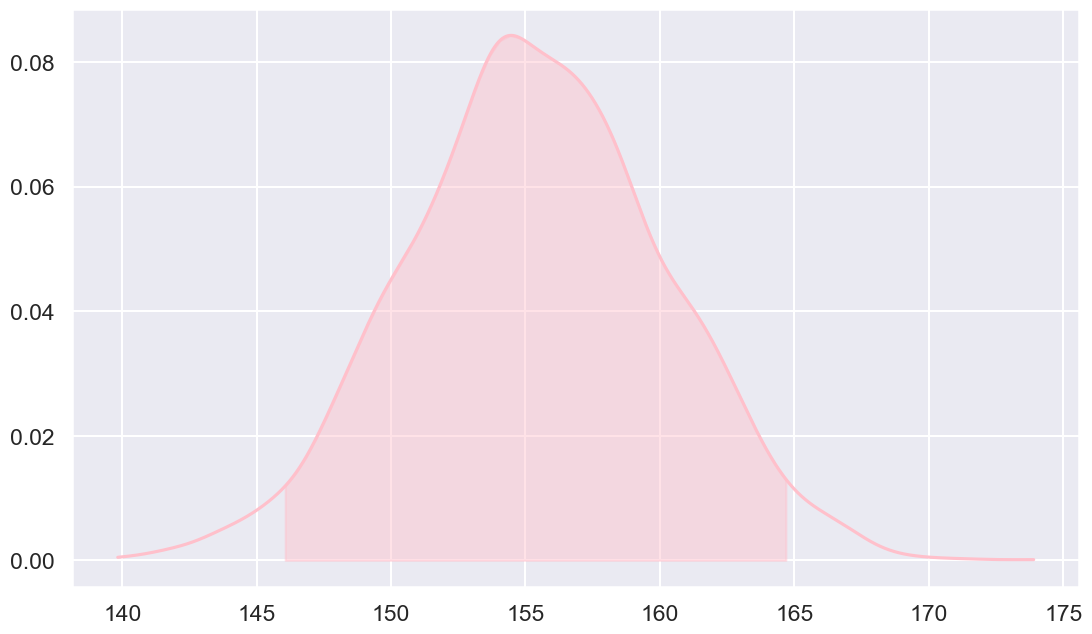

In [51]:
shade = np.linspace(lower_95, upper_95)
kde = stats.gaussian_kde(sample_means)
pos = np.linspace(np.min(sample_means), np.max(sample_means), 10000)
plt.plot(pos, kde(pos), color='pink')
plt.fill_between(shade, kde(shade), alpha=0.45, color='pink')

# Hypothesis Testing
Pernyataan hypothesis akan terlihat seperti: "Jika saya ... (melakukan A pada variabel independen)... Kemudian (B akan terjadi pada variabel dependen)."

Pernyataan hypothesis yang baik harus:
* Include an 'if' and 'then' statement (according to the University of California).
* Include both the independent and dependent variables.
* Be testable by experiment, survey or other scientifically sound technique.
* Be based on information in prior research (either yours or someone else's).
* Have design criteria (for engineering or programming projects).

Langkah-langkah uji hipotesis:
* Figure out your null hyphothesis.
* State your null hypothesis.
* Choose what kind of test you need to perform.
* Either support or reject the null hypothesis.

### One Population Propotion

#### Research Question
Pada tahun-tahun sebelumnya, 52% orang tua percaya bahwa elektronik dan media sosial adalah penyebab kurang tidur remaja mereka. Apakah saat ini semakin banyak orang tua yang percaya bahwa kurang tidur remaja mereka disebabkan oleh elektronik dan media sosial?


population: Orang tua dengan remaja usia 13-18

Parameter of interest: p


Null hypothesis: p = 0.52

Alternative Hypothesis: p> 0.52 

Data: 1018 orang di survei. 56% dari mereka yang disurvei percaya bahwa kurang tidur remaja mereka disebabkan oleh elektronik dan media sosial.



#### Use of proportion ztest() from statsmodels
Perhatikan argumen alternative = "larger" yang menunjukkan one-sided test. Fungsi ini mengembalikan dua niai z-statistic dan p-value yang sesuai.

In [3]:
n = 1018
pnull = 0.52
phat = 0.56

In [4]:
sm.stats.proportions_ztest(phat*n, n, pnull, alternative='larger')

(2.571067795759113, 0.005069273865860533)

In [7]:
# 2700 remaja disurvei
r =2700
# H0 20% hobi membaca buku
pn = 0.20
# hasil pengujian 18%
p = 0.18
sm.stats.proportions_ztest(p*r, r, pn, alternative='larger')

(-2.705008904002299, 0.996584872068478)

### Example hypothesis
h0 pria memiliki MBI rata-rata yang sama dengan wanita 
alternative hypothesis BMI pria tdk sama dengan wanita

data: 2976 Females, 2759 male

In [10]:
url = "https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/nhanes_2015_2016.csv"

In [11]:
data = pd.read_csv(url)

In [12]:
data

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5730,93695,2.0,2.0,NaN,1,2,76,3,1.0,3.0,...,112.0,46.0,59.1,165.8,21.5,38.2,37.0,29.5,95.0,2.0
5731,93696,2.0,2.0,NaN,2,1,26,3,1.0,5.0,...,116.0,76.0,112.1,182.2,33.8,43.4,41.8,42.3,110.2,2.0
5732,93697,1.0,NaN,1.0,1,2,80,3,1.0,4.0,...,146.0,58.0,71.7,152.2,31.0,31.3,37.5,28.8,NaN,2.0
5733,93700,NaN,NaN,NaN,1,1,35,3,2.0,1.0,...,106.0,66.0,78.2,173.3,26.0,40.3,37.5,30.6,98.9,2.0


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5735 entries, 0 to 5734
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      5735 non-null   int64  
 1   ALQ101    5208 non-null   float64
 2   ALQ110    1731 non-null   float64
 3   ALQ130    3379 non-null   float64
 4   SMQ020    5735 non-null   int64  
 5   RIAGENDR  5735 non-null   int64  
 6   RIDAGEYR  5735 non-null   int64  
 7   RIDRETH1  5735 non-null   int64  
 8   DMDCITZN  5734 non-null   float64
 9   DMDEDUC2  5474 non-null   float64
 10  DMDMARTL  5474 non-null   float64
 11  DMDHHSIZ  5735 non-null   int64  
 12  WTINT2YR  5735 non-null   float64
 13  SDMVPSU   5735 non-null   int64  
 14  SDMVSTRA  5735 non-null   int64  
 15  INDFMPIR  5134 non-null   float64
 16  BPXSY1    5401 non-null   float64
 17  BPXDI1    5401 non-null   float64
 18  BPXSY2    5535 non-null   float64
 19  BPXDI2    5535 non-null   float64
 20  BMXWT     5666 non-null   floa

In [17]:
females = data[data["RIAGENDR"] == 2]
males = data[data["RIAGENDR"] == 1]

In [18]:
n1 = len(females)
mu1 = females["BMXBMI"].mean()
sd1 = females["BMXBMI"].std()

(n1, mu1, sd1)

(2976, 29.939945652173996, 7.75331880954568)

In [20]:
sm.stats.ztest(females["BMXBMI"].dropna(),
              males["BMXBMI"].dropna(), alternative='two-sided')

(6.1755933531383205, 6.591544431126401e-10)

Karena p-value (6.5e-10) sangat kecil, kita dapat reject the Null hipothesis bahwa rata-rata BMI laki-laki sama dengan perempua. Catatan, kita menggunakan alternative="two-sided" dalam z-test karena di sini kita memeriksa ketidaksamaan.

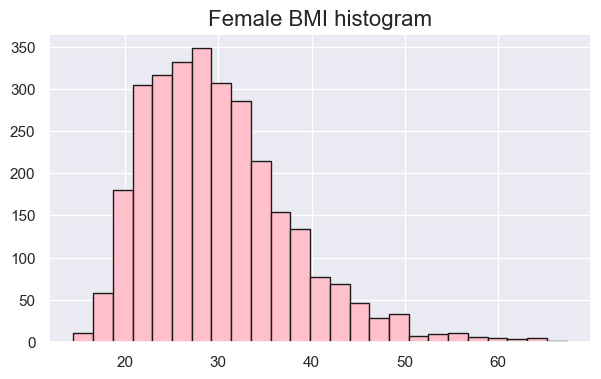

In [21]:
plt.figure(figsize=(7, 4))
plt.title("Female BMI histogram", fontsize=16)
plt.hist(females["BMXBMI"].dropna(), edgecolor='k', color='pink', bins=25)
plt.show()

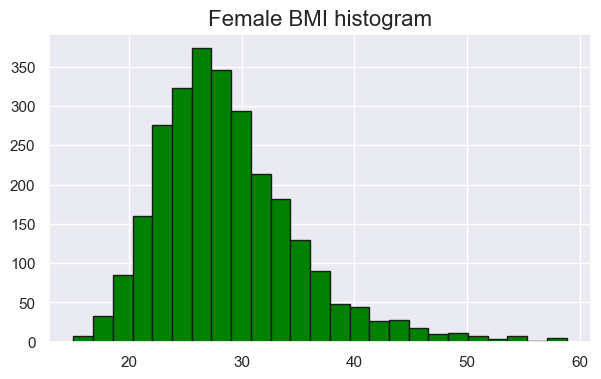

In [24]:
plt.figure(figsize=(7, 4))
plt.title("Female BMI histogram", fontsize=16)
plt.hist(males["BMXBMI"].dropna(), edgecolor='k', color='green', bins=25)
plt.show()

### Hypothesis Testing for One Proportion

In [28]:
# Kolom terakhir mengyatakan apakah seseorang menderita penyakit jantung atau tidak
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


Step 1 

h0 => population proportion yang menderita penyakit jantung di AS kurang dari atau sama dengan 41%
h_alternative => proporsinya lebih dari 42%

Step 2

Assume that the dataset above is a represintative sample from the population of the US.
Calculate the population of the US having heart disease.

In [30]:
p_us = len(df[df['target'] == 1]) / len(df)
p_us

0.5131707317073171

Population proportion sample yang mengalami penyakit jantung adalah 0.51 atau 51%. Persentase ini lebih dari null hypothesis yaitu 42%.

Tetapi pertanyaannya apakah secara signifikan lebih dari 42% jika kita mengambil sampel acak yang berbeda. Iya jika berbeda maka proporsi hasilnya pun bisa berbeda.

Step 3

Calculate the Test Statistic

In [32]:
se = np.sqrt(0.42* (1-0.42)/len(df))
se

0.015416177755376521

In [33]:
# Best estimate
be = p_us 

# hipothesis estimate
he = 0.42
test_stat = (be-he)/se

In [34]:
test_stat

6.04369858636477

Step 4

Calcute the p-value

Test ini disebut juga z-score

In [37]:
pvalue = 2*dist.norm.cdf(-np.abs(test_stat))
pvalue

1.5062078087269162e-09

Step 5 

Infer the conclution from the p-value. 

Perhatikan significance level yang kita tentukan yaitu 0.05. Jadi, kita reject the null hypothesis. Artinya terdapat perbedaan yang signifikan dalam proporsi penduduk yang menderita penyakit jantung di Irlandia dan US.

### Statistical Hypothesis test cheat sheet 

### Normality Test 
this section lists statistical test that you can use to check if your data has a Gaussian distribution.

* Assumptions

observation n each sample are independent and identically distributed (iid)

* Interpretation 

H0: the sample has a Gaussian distribution

H1: the sample does not have a gaussian distribution

##### Shapiro-Wilk Test

In [39]:
data = [0.873, 2.817, 0.121, -0.0055, -1.436, 0.360]
stat, p = shapiro(data)
print('stat=%.3f, p=%3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print("Probably not gaussian")

stat=0.933, p=0.602339
Probably Gaussian


In [40]:
shapiro(data)

ShapiroResult(statistic=0.9328569769859314, pvalue=0.6023390293121338)

##### D'Agostino's K^2 Test

In [42]:
from scipy.stats import normaltest
data = [0.873, 2.817, 0.121, -0.0055, -1.436, 0.360, -1.478, -1.637, 0.360]
stat, p = normaltest(data)
print('stat=%.3f, p=%3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print("Probably not gaussian")

stat=1.648, p=0.438774
Probably Gaussian


C:\Users\ACER\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [50]:
from scipy.stats import anderson
result = anderson(data)
print('stat=%.3f' % (result.statistic))
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < cv:
        print('Probably Gaussian at the %.1f%% level' % (sl))
    else:
        print('Bukan gaussian at the %.1f%% level' %(sl))
        

stat=0.445
Probably Gaussian at the 15.0% level
Probably Gaussian at the 10.0% level
Probably Gaussian at the 5.0% level
Probably Gaussian at the 2.5% level
Probably Gaussian at the 1.0% level


### Correlation Test

In [95]:
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import kendalltau
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel
from scipy.stats import f_oneway
from scipy.stats import wilcoxon
from scipy.stats import kruskal
from scipy.stats import friedmanchisquare
from scipy.stats import chi2_contingency
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

In [52]:
data1 = [1, 2, 3, -3, 4, 5, 5, 6, 6 ]
data2 = [2, 3, 3, -1, 4, 3, 5, 2, 6 ]

### Pearson's Correlation Coefficient
Interpretation
* H0: the two sample are independent
* H1: there is a dependency between the samples

In [54]:
stat, p = pearsonr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probable independent')
else :
    print("Probably dependent")

stat=0.796, p=0.010
Probably dependent


### Spearman's Correlation Coefficient
* H0: the two sample are independent
* H1: there is a dependency between the samples

In [56]:
stat, p =spearmanr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probable independent')
else :
    print("Probably dependent")

stat=0.571, p=0.108
Probable independent


### Kendall's Rank Correlation

In [59]:
stat, p = kendalltau(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probable independent')
else :
    print("Probably dependent")

stat=0.546, p=0.052
Probable independent


### Chi-square Test

In [64]:
table = [[10, 20, 40], [7, 8, 7]]
stat, p, dof, expected = chi2_contingency(table)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Independent')
else:
    print('Probably Dependent')    

stat=5.220, p=0.074
Probably Independent


### Augmented Dickey-Fuller unit root test

In [71]:
stat, p, lags, obs, crit, t = adfuller(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probabli not stationary')
else: 
    print('Probably stationary')

stat=-1.996, p=0.288
Probabli not stationary


### Kwiatkowski-Philips-Schmidt-Shin

In [73]:
stat, p, lags, crit = kpss(data1)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probabli not stationary')
else: 
    print('Probably stationary')

stat=0.400, p=0.077
Probabli not stationary


### Student's t-test
* H0: the means of the samples are equal
* H1: the means of the samples are unequal

In [77]:
stat, p = ttest_ind(data1, data2)
print('stat=%.3f, p=%3f' % (stat, p))
if p > 0.05:
    print('Probably not stationary')
else: 
    print('Probably stationary')

stat=0.189, p=0.852483
Probably not stationary


### Paired Student's t-test

In [79]:
stat, p = ttest_rel(data1, data2)
print('stat=%.3f, p=%3f' % (stat, p))
if p > 0.05:
    print('Probably not stationary')
else: 
    print('Probably stationary')

stat=0.373, p=0.718836
Probably not stationary


### Analysis of Variance Test (ANOVA)

In [82]:
data3= 2*data2

In [85]:
stat, p = f_oneway(data1, data2, data3)
print('stat=%.3f, p=%3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else: 
    print('Probably different distribution')

stat=0.034, p=0.966964
Probably the same distribution


### Wilcoxon Signed-Rank Test

In [91]:
stat, p = wilcoxon(data1, data2)
print('stat=%.3f, p=%3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else: 
    print('Probably different distribution')

stat=6.500, p=0.785495
Probably the same distribution


### Kruscal-Wallis H Test

In [94]:
stat, p = kruskal(data1, data2)
print('stat=%.3f, p=%3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else: 
    print('Probably different distribution')

stat=0.242, p=0.623051
Probably the same distribution


### Friedman Test

In [100]:
stat, p = friedmanchisquare(data1, data2, data)
print('stat=%.3f, p=%3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else: 
    print('Probably different distribution')

stat=7.000, p=0.030197
Probably different distribution


In [102]:
data1

[1, 2, 3, -3, 4, 5, 5, 6, 6]

In [103]:
data2

[2, 3, 3, -1, 4, 3, 5, 2, 6]

In [104]:
data

[0.873, 2.817, 0.121, -0.0055, -1.436, 0.36, -1.478, -1.637, 0.36]